<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [119]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [45]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

In [55]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [56]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
#df = pd.read_csv(filepath, header=None)

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [68]:
file_name = "insurance.csv"
df = pd.read_csv(file_name)
print(df.head(10))
# df.head(10)

   19  1    27.9  0 1.1  3    16884.924
0  18  2  33.770  1   0  4   1725.55230
1  28  2  33.000  3   0  4   4449.46200
2  33  2  22.705  0   0  1  21984.47061
3  32  2  28.880  0   0  1   3866.85520
4  31  1  25.740  0   ?  4   3756.62160
5  46  1  33.440  1   0  4   8240.58960
6  37  1  27.740  3   0  1   7281.50560
7  37  2  29.830  2   0  2   6406.41070
8  60  1  25.840  0   0  1  28923.13692
9  25  2  26.220  0   0  2   2721.32080


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(file_name, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [69]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [70]:
df.replace('?', np.nan, inplace = True)

<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [71]:
print(df.info())
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB
None


age                True
gender            False
bmi               False
no_of_children    False
smoker             True
region            False
charges           False
dtype: bool

<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [72]:
# For continuous attributes (e.g., age), replace missing values with the mean.
# errors='coerce': Forces invalid entries to become NaN (Not a Number) instead of raising an error.
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Replace missing values in the 'age' column with the mean of the column
df['age'] = df['age'].fillna(df['age'].mean())

In [73]:
# For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
# Replace NaN with the mode
# Find the most frequent value (mode)
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')
most_frequent = df['smoker'].mode()[0]
df['smoker'] = df['smoker'].fillna(most_frequent)

In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   float64
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   float64
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.6 KB
None


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [77]:
df['charges'] = df['charges'].round(2)
print(df['charges'].head())

0     1725.55
1     4449.46
2    21984.47
3     3866.86
4     3756.62
Name: charges, dtype: float64


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


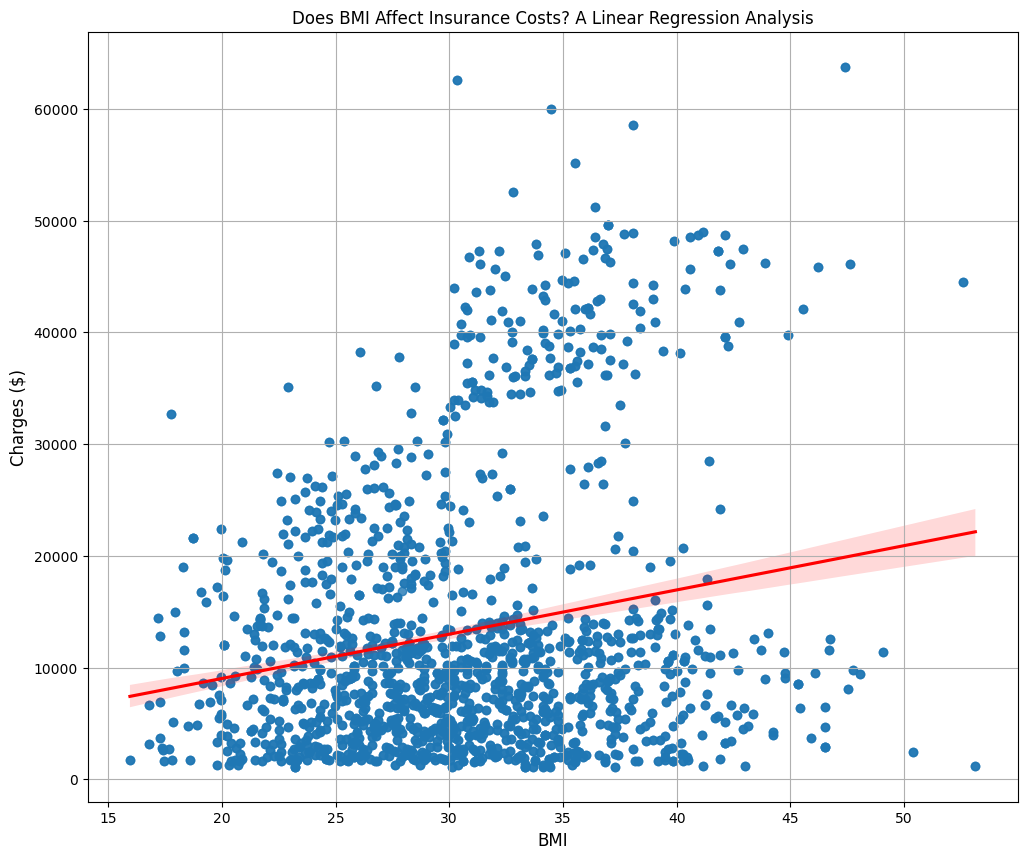

In [87]:
[w, h] = [12, 10]
x_data = df['bmi']
y_data = df['charges']
plt.figure(figsize=(w, h))
sns.regplot(x = x_data, y = y_data, line_kws={"color": "red"})
plt.title('Does BMI Affect Insurance Costs? A Linear Regression Analysis')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.grid(True)
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


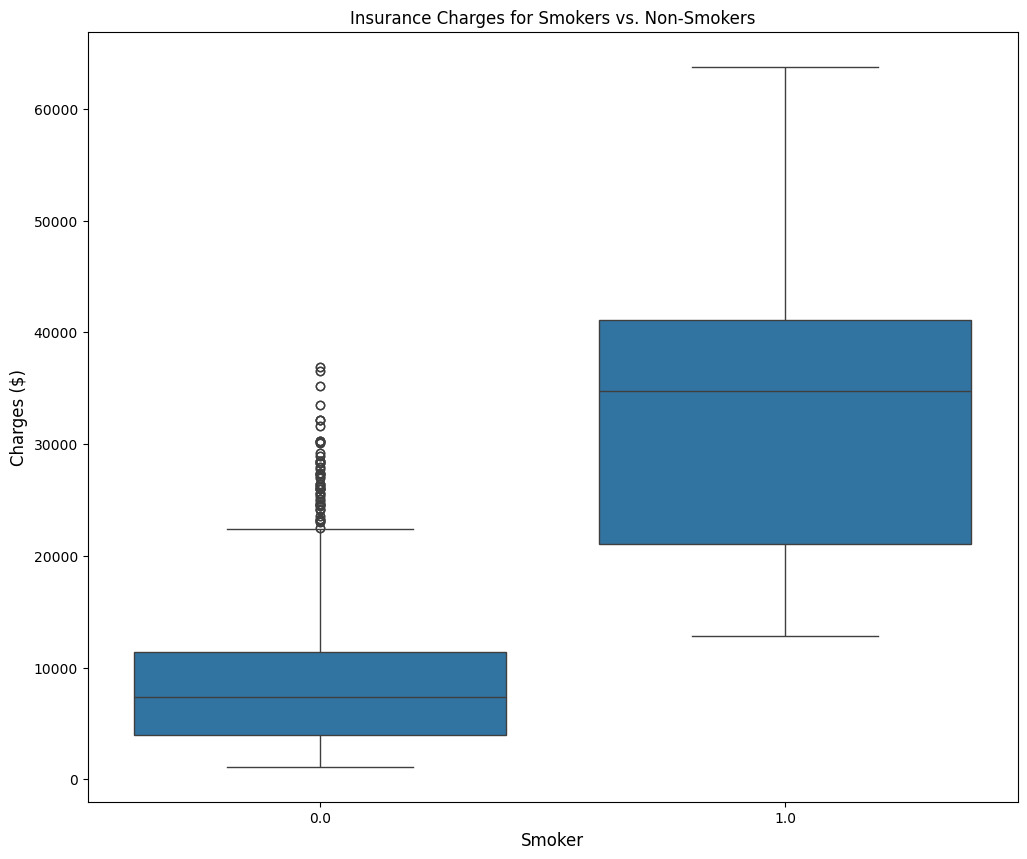

In [86]:
[w, h] = [12, 10]
x_data = df['smoker']
y_data = df['charges']
plt.figure(figsize=(w, h))
# sns.boxplot(x=x_data, y=y_data, 
#             hue=x_data,  # Explicitly use hue with x_data
#             palette={'yes': 'lightcoral', 'no': 'lightblue'},
#             linewidth=1.5,
#             legend=False)  # Hide redundant legend
sns.boxplot(x=x_data, y=y_data)
plt.title('Insurance Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()



<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [93]:
corr_matrix = df.corr(numeric_only=True) # ensure only numeric 
corr_matrix

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
gender,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


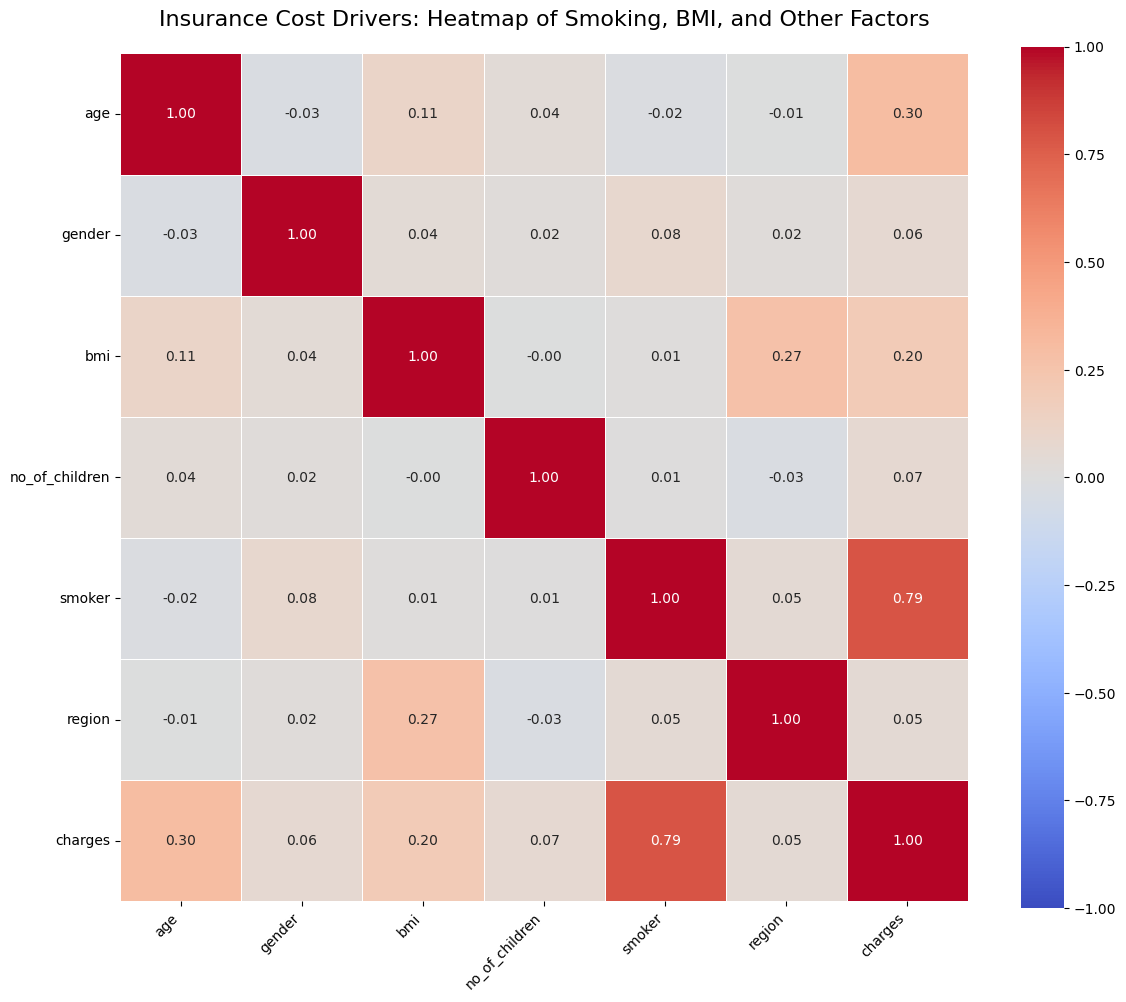

In [95]:
[w, h] = [12, 10]
plt.figure(figsize=(w, h))
sns.heatmap(
    corr_matrix,
    annot=True,      # Show correlation values
    fmt=".2f",       # 2 decimal places
    cmap="coolwarm",  # Blue (negative) -> Red (positive)
    vmin=-1,         # Minimum correlation value
    vmax=1,          # Maximum correlation value
    linewidths=0.5,
    square=True      # Square-shaped cells
)

plt.title("Insurance Cost Drivers: Heatmap of Smoking, BMI, and Other Factors", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label cutoff
plt.show()

# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [105]:
X = df[['smoker']]
Y = df[['charges']]
regmodel = LinearRegression()
regmodel.fit(X, Y)
Yhat = regmodel.predict(X)

print('actual r^2 score: ', regmodel.score(X, Y))
print('predicted r^2 score: ', regmodel.score(X, Yhat))

actual r^2 score:  0.6227430402464125
predicted r^2 score:  1.0


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [111]:
X2 = df.drop(columns=['charges'])
Y2 = df[['charges']]
regmodel2 = LinearRegression()
regmodel2.fit(X2, Y2)
Yhat2 = regmodel2.predict(X2)

print('actual r^2 score: ', regmodel2.score(X2, Y2))
print('predicted r^2 score: ', regmodel2.score(X2, Yhat2))

actual r^2 score:  0.7505867314418195
predicted r^2 score:  1.0


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [120]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

X2_2 = X2.astype(float)
pipeline.fit(X2_2, Y2)
Yhat2_pipeline = pipeline.predict(X2_2)

print('r^2 score: ', r2_score(Y2, Yhat2_pipeline))

r^2 score:  0.8441989794489815


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [121]:
x_train, x_test, y_train, y_test = train_test_split(X2_2, Y2, test_size = 0.20, random_state=1)

<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [124]:
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(x_train, y_train)
train_score = ridgereg.score(x_train, y_train)
test_score = ridgereg.score(x_test, y_test)
print("Test Score: ", test_score, "Train Score: ", train_score)

yhat2_ridge = ridgereg.predict(x_test)
print('test score: ', r2_score(y_test, yhat2_ridge))

Test Score:  0.7254194018864437 Train Score:  0.7563467663973875
test score:  0.7254194018864437


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [125]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
ridgereg.fit(x_train_pr, y_train)
yhat2_pr = ridgereg.predict(x_test_pr)
print(r2_score(y_test, yhat2_pr))

0.8208407204311221


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
